In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
customer=pd.read_csv('C:/Users/kalya/Documents/PycharmProjects/FeatureEngineering/Customer6.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [130]:
customer.shape

(7043, 21)

In [131]:
numcol=customer.select_dtypes(include=['int','float']).columns.to_list()

In [132]:
numcol

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [133]:
catcol=customer.select_dtypes(include='object').columns.to_list()
catcol

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [134]:
len(catcol)

18

In [135]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [136]:
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [137]:
customer.duplicated().sum()

0

## UNIVARIATE

<Axes: xlabel='SeniorCitizen'>

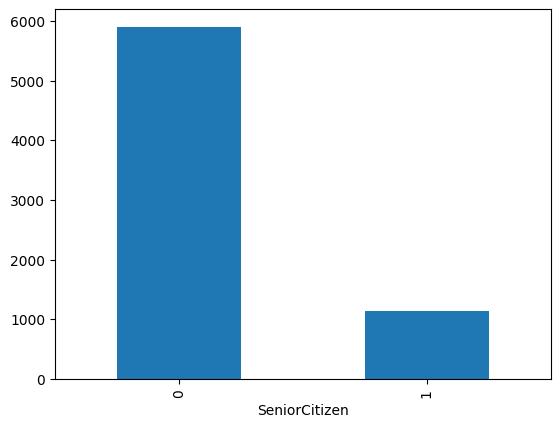

In [138]:
customer['SeniorCitizen'].value_counts().plot(kind='bar')

In [139]:
(len(customer[customer['SeniorCitizen']== 1])/len(customer['SeniorCitizen']))*100 # only 16 percent of total are senior citizen 

16.21468124378816

In [140]:
customer['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

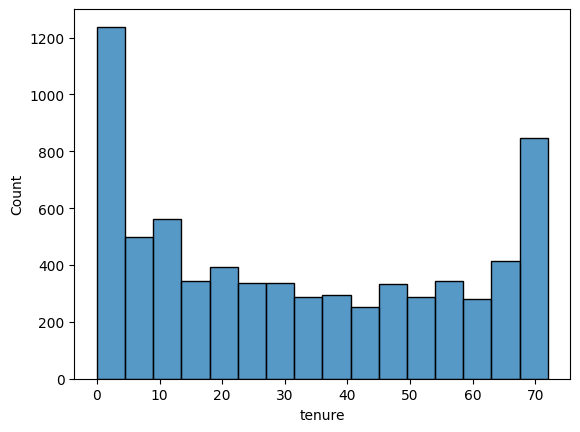

In [141]:
sns.histplot(x='tenure',data=customer)
plt.show() # many customers stay from 0 to 5, either very short or very long (70 months)

In [142]:
customer['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

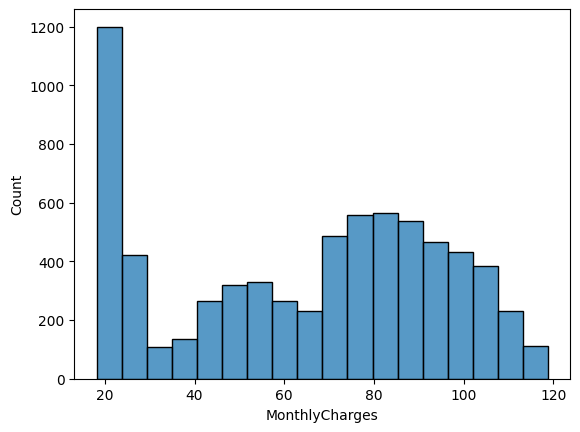

In [143]:
sns.histplot(x='MonthlyCharges',data=customer)
plt.show() # ppl opt for 20$ plan the most, as family size increase the opt for next lowest plan in the category.

In [144]:
customer['customerID'].nunique()

7043

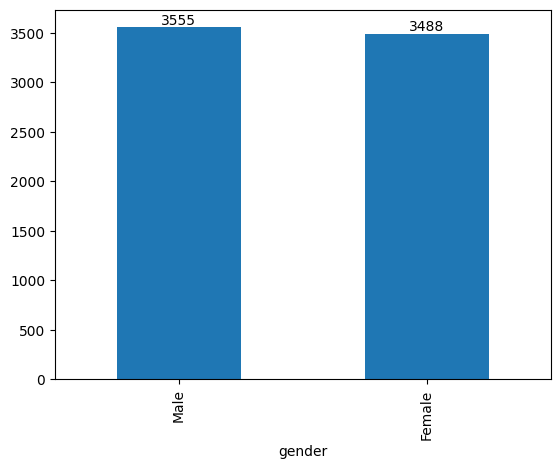

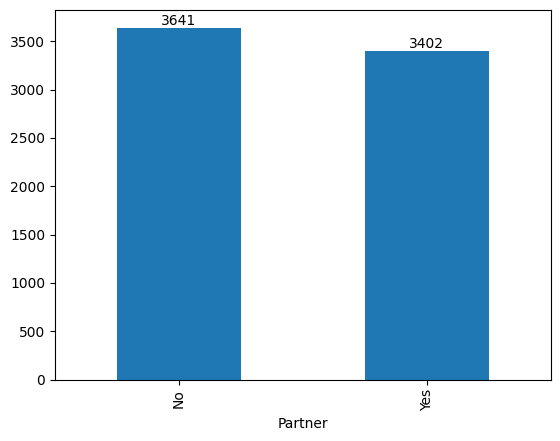

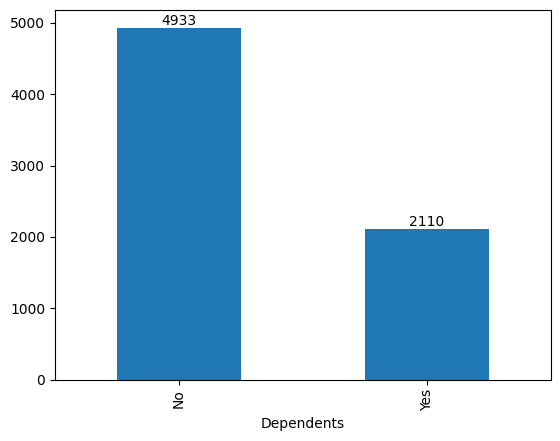

In [145]:
customer_info=['gender',
 'Partner',
 'Dependents']
for i in customer_info:
    ax = customer[i].value_counts().plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.show()

In [146]:
services=customer.columns[6:15].to_list()
services

['PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

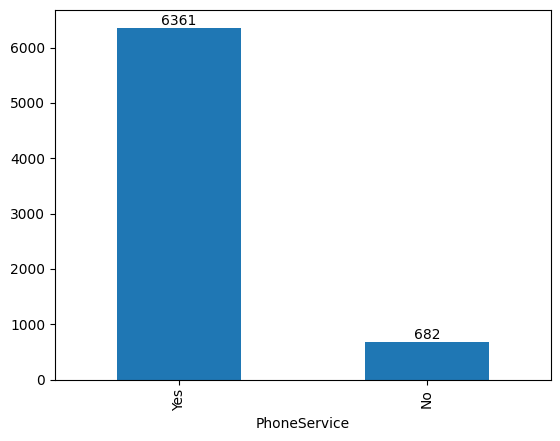

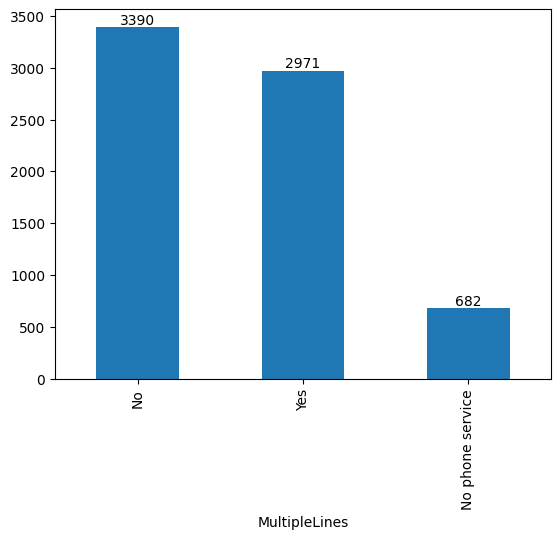

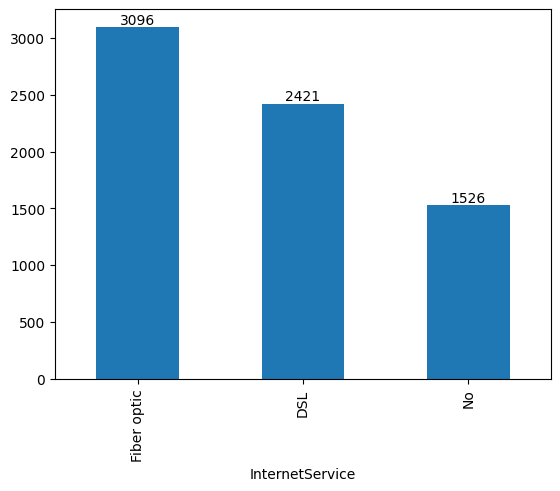

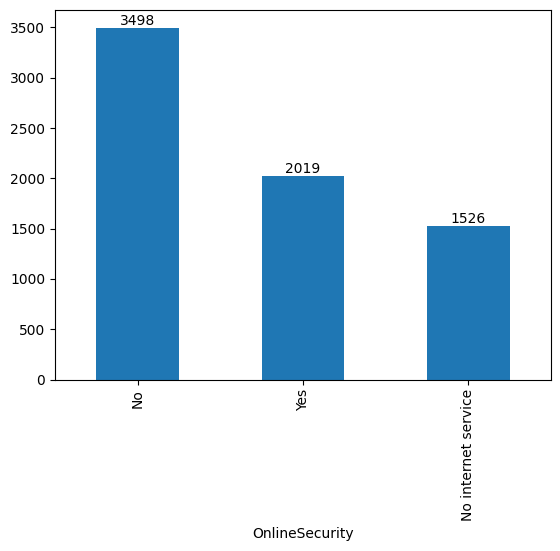

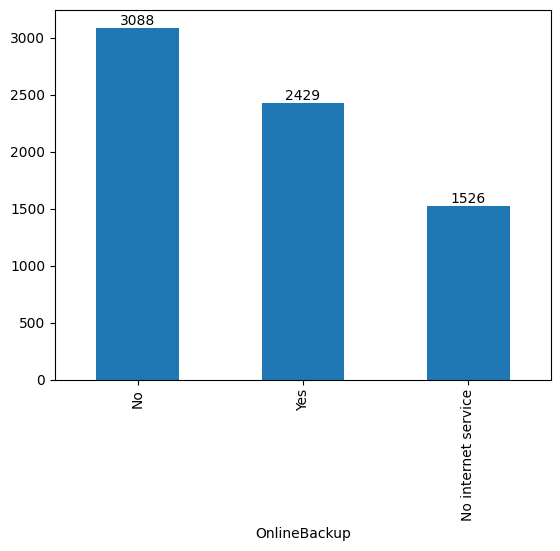

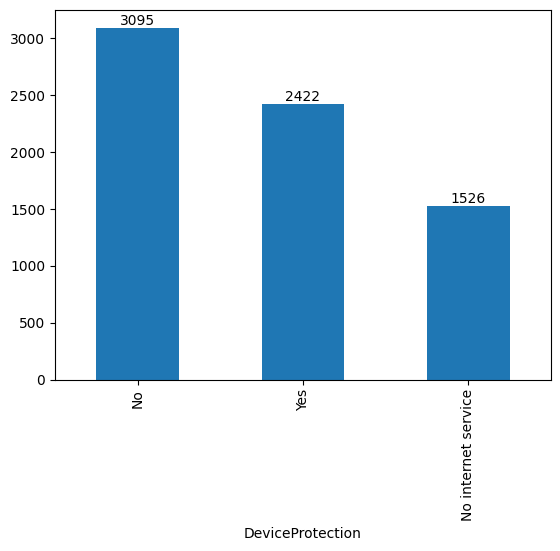

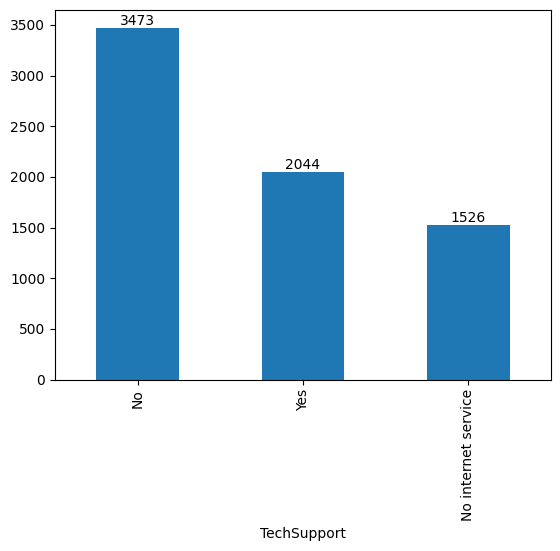

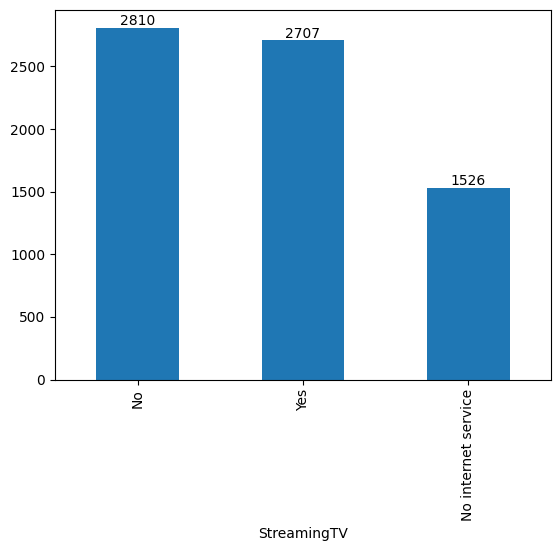

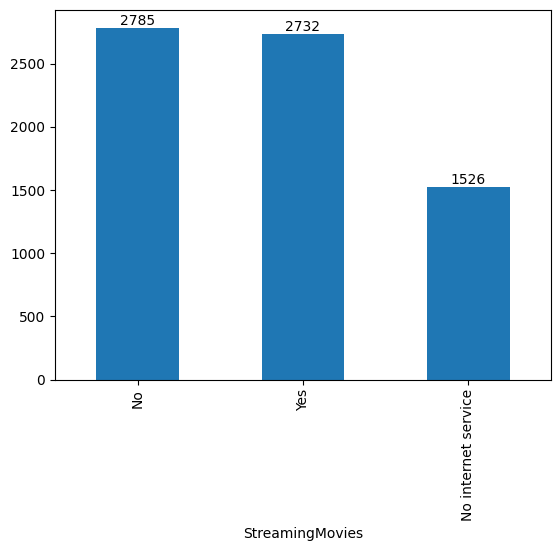

In [147]:
for service in services:
    ax=customer[service].value_counts().plot(kind='bar')
    for a in ax.patches:
        ax.annotate(str(a.get_height()),(a.get_x() + a.get_width()/2.,a.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points')
    plt.show()
   

In [148]:
#very few ppl dont have phone service.
#tv and movies have equal yes n no
#tech ,backup,security has more no
#fiber optic is most opted

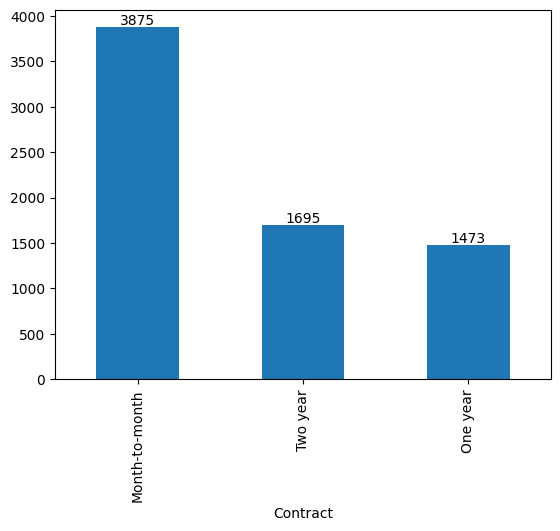

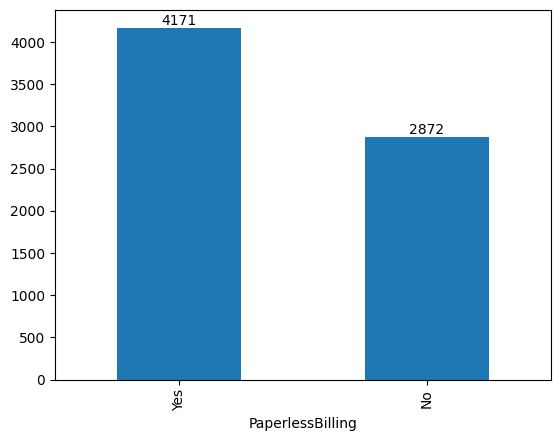

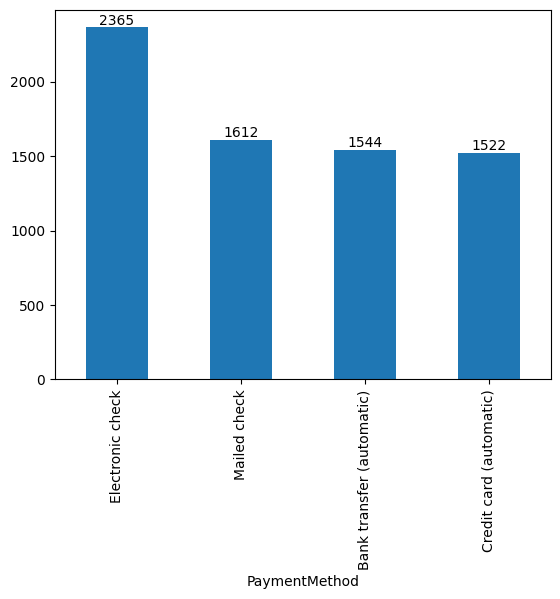

In [149]:
bill=['Contract','PaperlessBilling','PaymentMethod']
for b in bill:
    ax=customer[b].value_counts().plot(kind='bar')
    for a in ax.patches:
        ax.annotate(str(a.get_height()),(a.get_x() + a.get_width()/2.,a.get_height()),ha='center',va='center',xytext=(0,5),textcoords='offset points')
    plt.show()

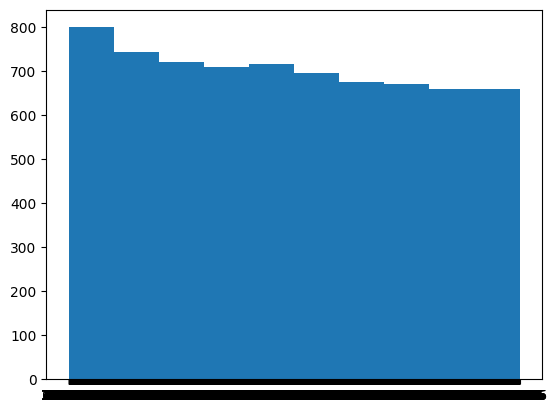

In [150]:
plt.hist(x='TotalCharges',data=customer)
plt.show()

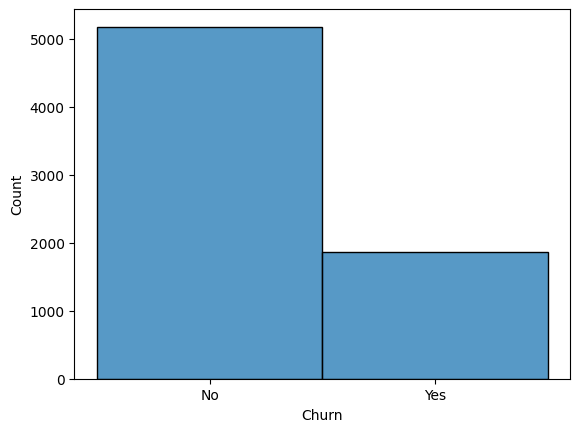

In [151]:
sns.histplot(x='Churn',data=customer)
plt.show()

## BIVARIATE


In [152]:
dic={'Yes':2,'No':1}
customer['Partner']=customer['Partner'].map(dic)

In [153]:
newdic={'Yes':1,'No':0}
customer['Dependents']=customer['Dependents'].map(newdic)

In [154]:
customer['total']=customer['Partner']+customer['Dependents']

In [155]:
bins=6
labels = ['1','2','3','4','5','6'] 
customer['binned_tenure']=pd.cut(customer['tenure'],bins,right=False,labels=labels)

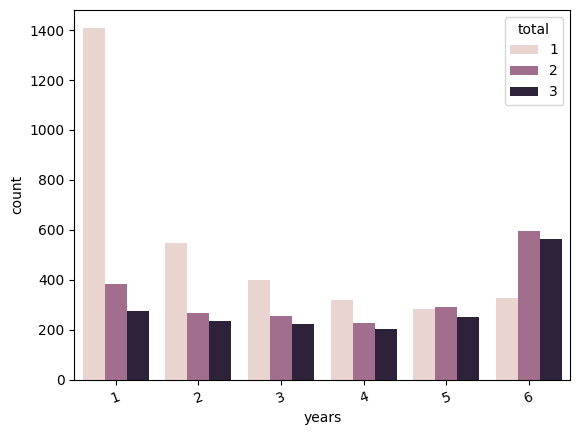

In [156]:
sns.countplot(x='binned_tenure',data=customer,hue='total')
plt.xlabel('years')
plt.xticks(rotation=20)
plt.show()

In [157]:
#single person stay for shorter time with the company , those who have 2 or 3 dependents stay longer

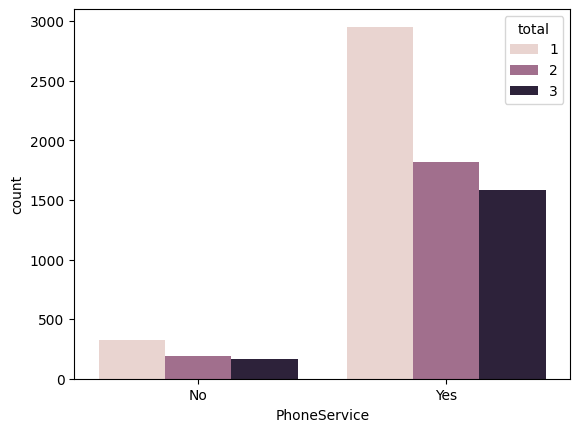

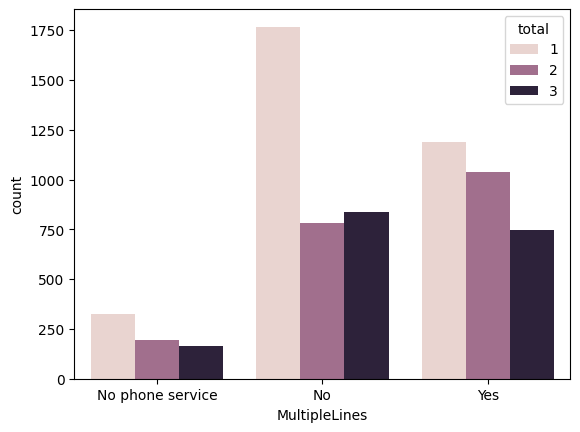

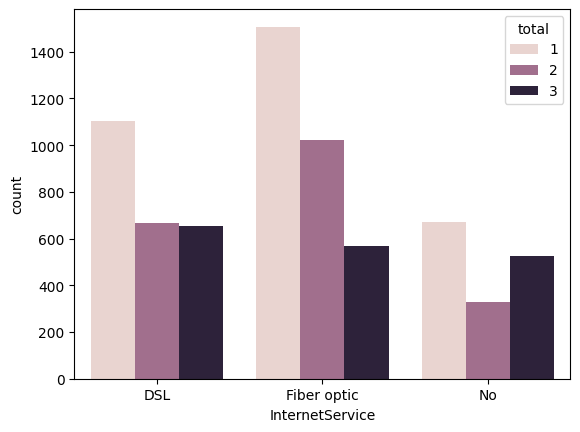

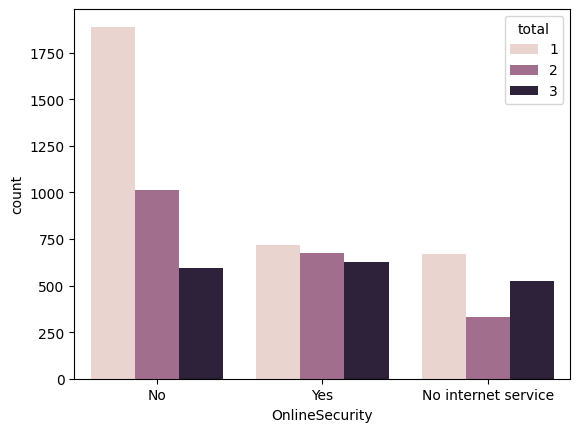

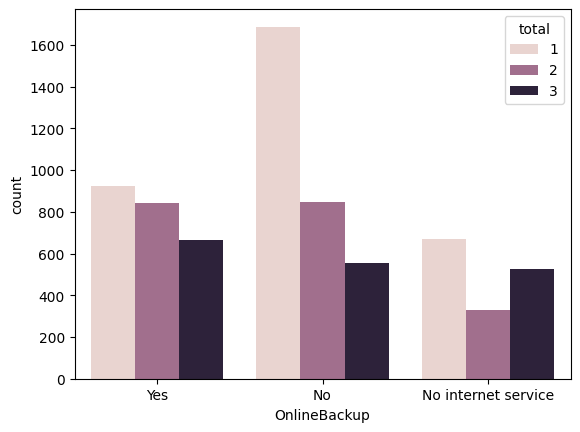

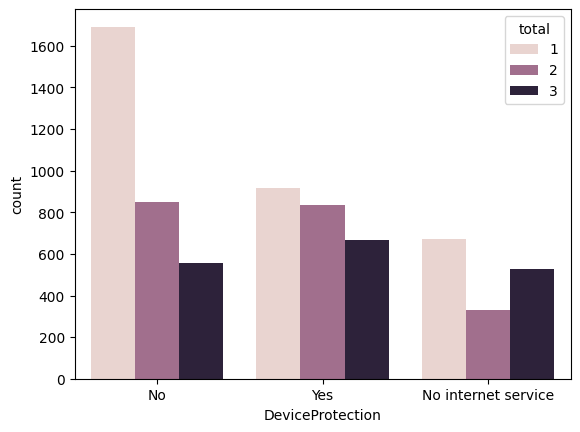

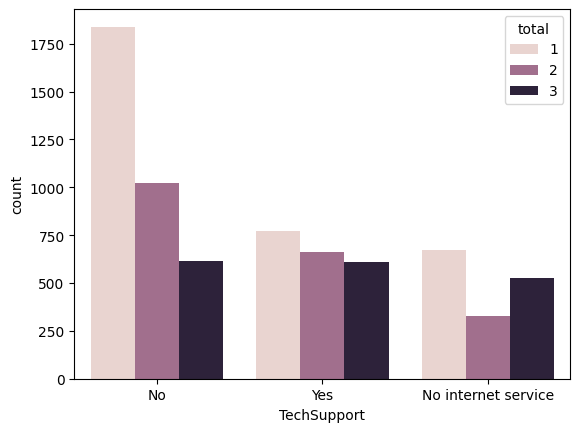

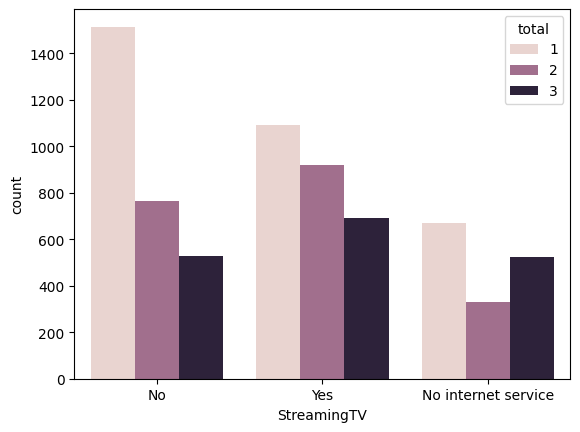

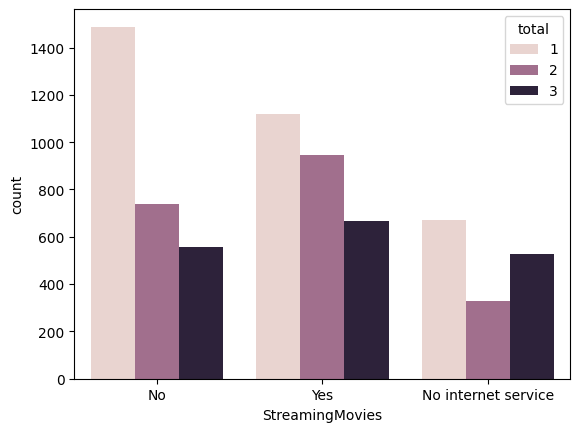

In [158]:
for i in services:
    sns.countplot(x=i,data=customer,hue='total')
    plt.show()

In [159]:
# single person doesnt nedd multiple lines,online backup,protection,

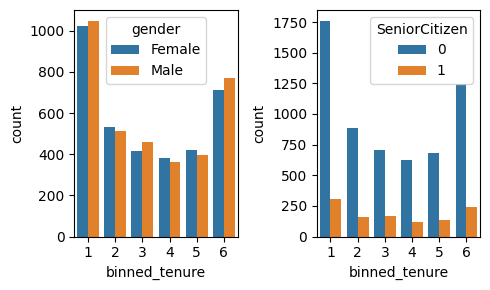

In [160]:
fig,ax=plt.subplots(1,2,figsize=(5,3))
sns.countplot(x='binned_tenure', data=customer, hue='gender', ax=ax[0])
sns.countplot(x='binned_tenure', data=customer, hue='SeniorCitizen', ax=ax[1])
plt.tight_layout()
plt.show()

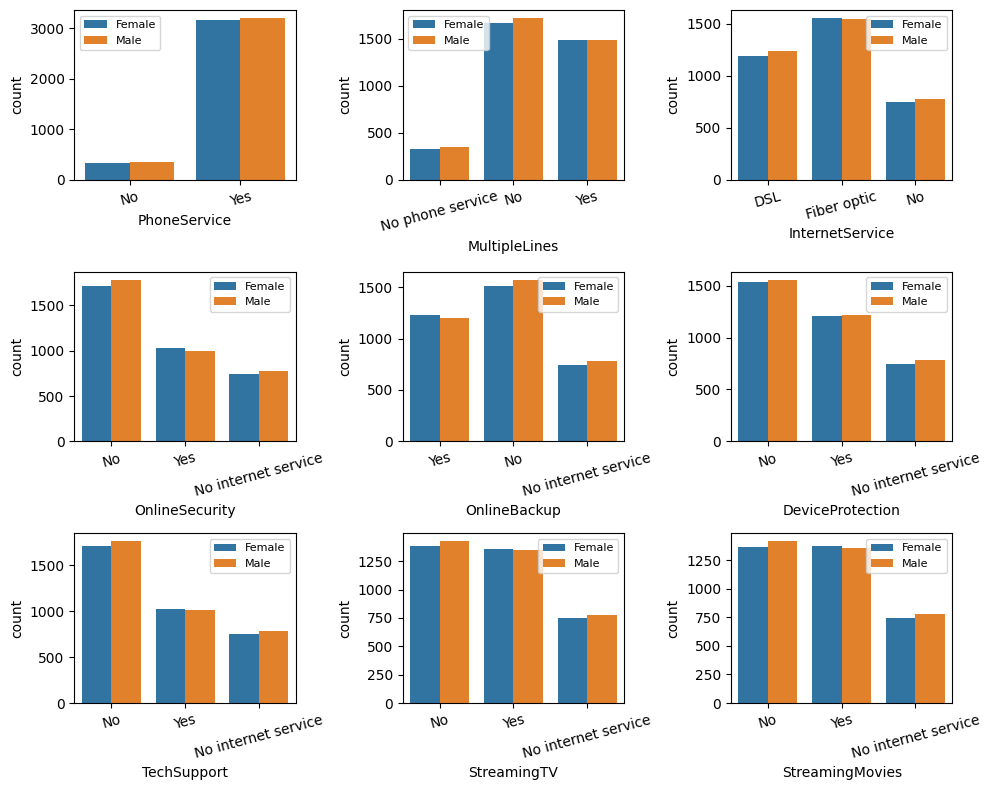

In [161]:
fig,ax=plt.subplots(3,3,figsize=(10,8))
for index, service in enumerate(services):
    sns.countplot(x=service, data=customer, hue='gender', ax=ax[index//3, index%3])
    ax[index//3, index%3].legend(fontsize=8)
    ax[index//3, index%3].tick_params(axis='x', rotation=15)
plt.tight_layout()
plt.show()

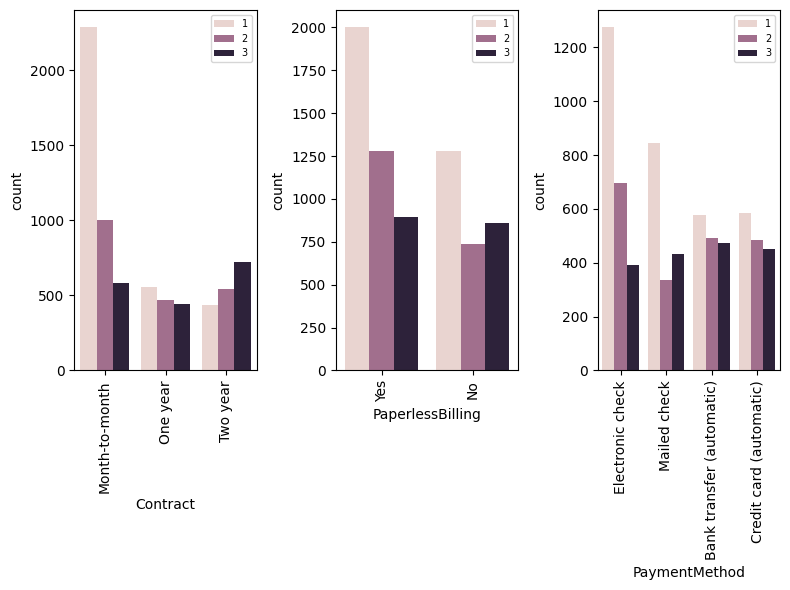

In [162]:
fig,ax=plt.subplots(1,3,figsize=(8,6))
for index,b in enumerate(bill):
    sns.countplot(x=b,data=customer,hue='total',ax=ax[index])
    ax[index].legend(fontsize=7)
    ax[index].tick_params(axis='x',rotation=90)
plt.tight_layout()
plt.show()

In [163]:
#singles go monthbymonth and more dependents go for 2 year contract
#paperless billing preferred by singles
#e or mail check tops in payment among singles

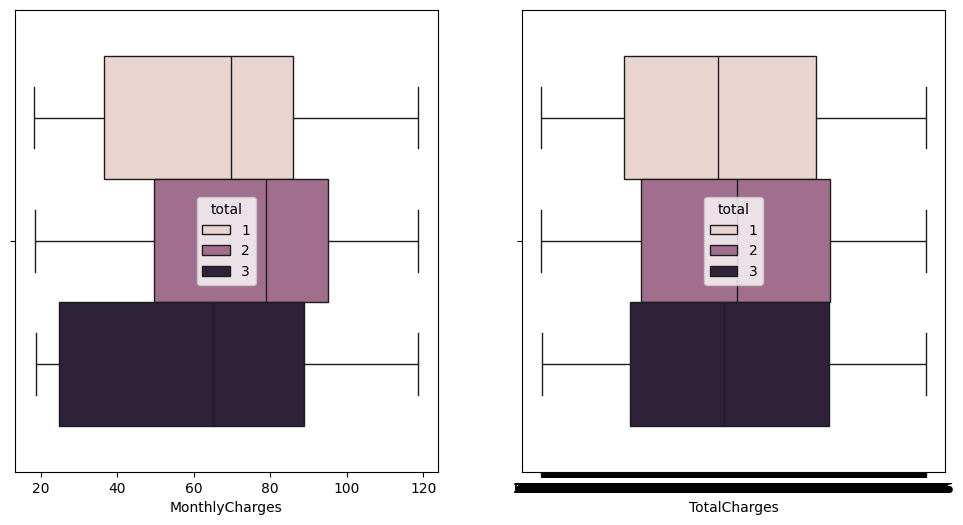

In [164]:
charges = ['MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, c in enumerate(charges):
    sns.boxplot(x=c, data=customer, hue='total', ax=axes[i])
plt.show()

In [165]:
#2 person family has higher monthly charge..and there in high variability in 3 member family..

## rep with wrt to Churn

In [166]:
customer['TotalCharges'] = pd.to_numeric(customer['TotalCharges'], errors='coerce')
customer['TotalCharges'].fillna(0, inplace=True)  
customer['TotalCharges'] = customer['TotalCharges'].astype('float64')

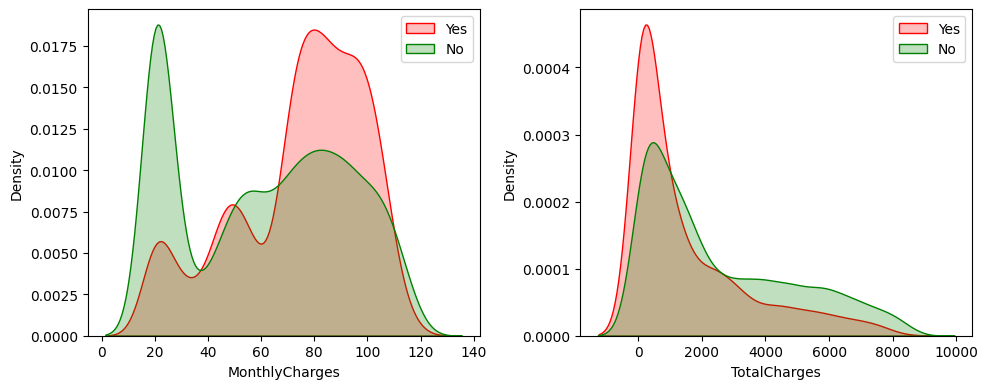

In [167]:

fig,ax=plt.subplots(1,2,figsize=(10,4))
sns.kdeplot(customer['MonthlyCharges'][customer['Churn']=='Yes'],fill=True,ax=ax[0],color='r')
sns.kdeplot(customer['MonthlyCharges'][customer['Churn']=='No'],fill=True,ax=ax[0],color='g')
ax[0].legend(['Yes','No'])

sns.kdeplot(customer['TotalCharges'][customer['Churn']=='Yes'],fill=True,ax=ax[1],color='r')
sns.kdeplot(customer['TotalCharges'][customer['Churn']=='No'],fill=True,ax=ax[1],color='g')
ax[1].legend(['Yes','No'])
fig.tight_layout()                    

In [168]:
## those who spend 60 to 100 monthly likely to opt out of company

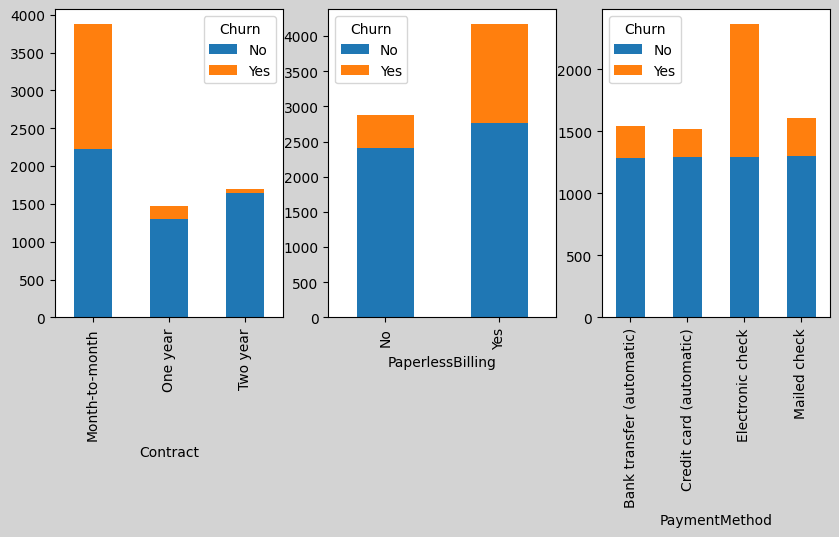

In [169]:
fig,axes=plt.subplots(1,3,figsize=(10,4),facecolor='lightgray')
for i,b in enumerate(bill):
    pd.crosstab(customer[b],customer['Churn']).plot(kind='bar',ax=axes[i],stacked=True)
#likely churn are monthbymonth ,  Echeck payment customer, go out to other firm.  

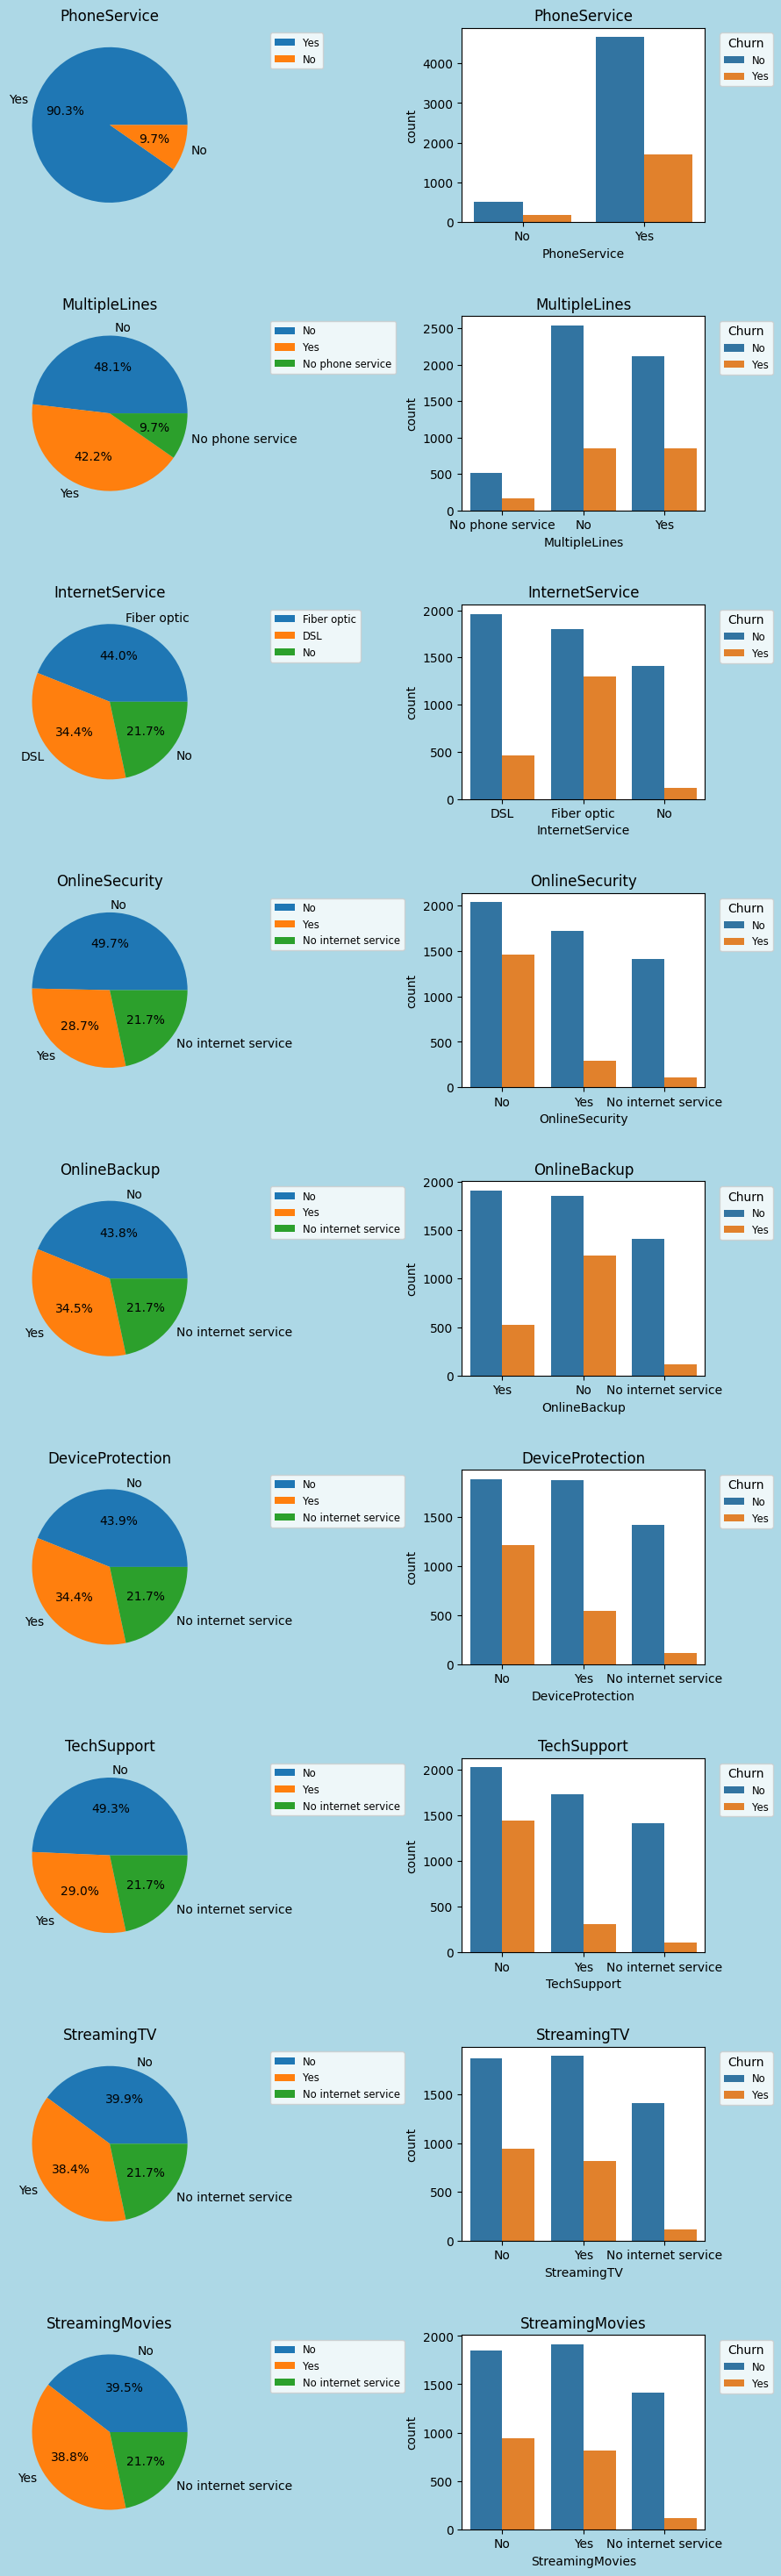

In [170]:
fig,ax=plt.subplots(9,2,figsize=(10,30),facecolor='lightblue')
ax = ax.flatten()
for i,ser in enumerate(services):
    data=customer[ser]
    ax[i*2].pie(data.value_counts(),labels=data.value_counts().index,autopct="%1.1f%%")
    ax[i*2].set_title(ser)
    

    sns.countplot(data=customer,x=ser,hue='Churn',ax=ax[i*2+1])
    ax[i*2+1].set_title(ser)

    ax[i*2].legend(loc="upper left", fontsize='small', bbox_to_anchor=(1.3, 1.0))
    ax[i*2+1].legend(title='Churn', loc="upper right", fontsize='small', bbox_to_anchor=(1.3, 1.0))

fig.tight_layout(pad=3.0)

In [171]:
# those who dont want any fiber optic(means this is poor),online support,backup or tech support, protection they are more likely to endup services with company

In [172]:
scalecols=customer.columns[6:18]
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in scalecols:
    customer[col]=encoder.fit_transform(customer[col])

In [173]:
customer.drop(columns=['customerID','Partner','Dependents','TotalCharges','binned_tenure'],inplace=True)

In [174]:
customer.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,total
0,Female,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,No,2
1,Male,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,No,1
2,Male,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,Yes,1
3,Male,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,No,1
4,Female,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,Yes,1


In [175]:
dic={'Female':0,'Male':1}
customer['gender']=customer['gender'].map(dic)

In [176]:
dictt={'Yes':1,'No':0}
customer['Churn']=customer['Churn'].map(dictt)

In [177]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   PhoneService      7043 non-null   int32  
 4   MultipleLines     7043 non-null   int32  
 5   InternetService   7043 non-null   int32  
 6   OnlineSecurity    7043 non-null   int32  
 7   OnlineBackup      7043 non-null   int32  
 8   DeviceProtection  7043 non-null   int32  
 9   TechSupport       7043 non-null   int32  
 10  StreamingTV       7043 non-null   int32  
 11  StreamingMovies   7043 non-null   int32  
 12  Contract          7043 non-null   int32  
 13  PaperlessBilling  7043 non-null   int32  
 14  PaymentMethod     7043 non-null   int32  
 15  MonthlyCharges    7043 non-null   float64
 16  Churn             7043 non-null   int64  


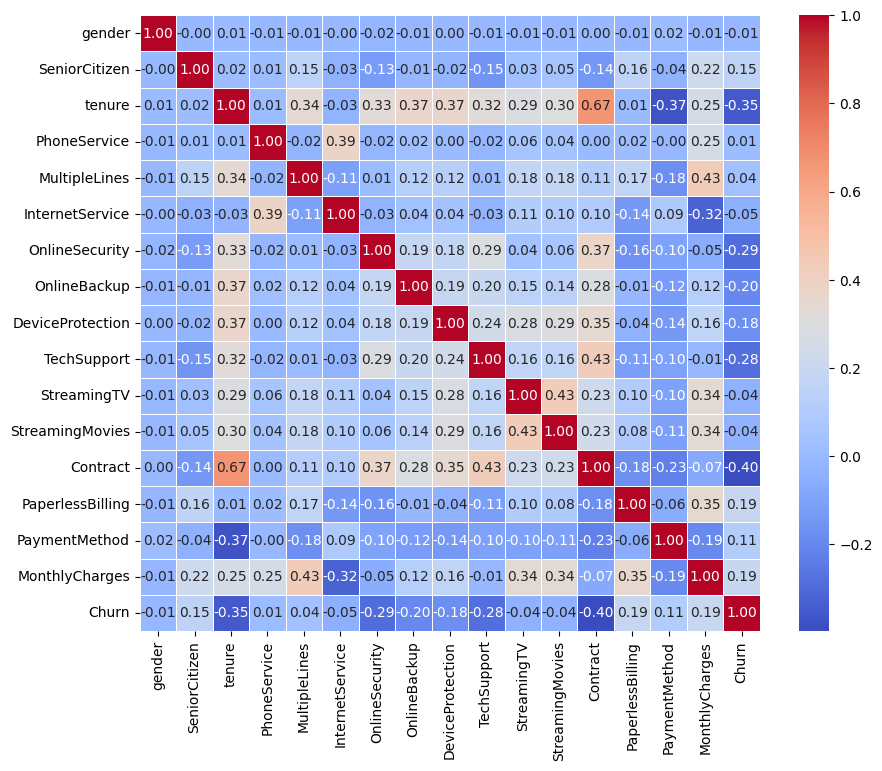

In [178]:
mapcols=customer.columns[0:17].to_list()
corr_matrix=customer[mapcols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,fmt=".2f", linewidths=0.5)
plt.show()

In [179]:
customer.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,total
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0,2
1,1,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0,1
2,1,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1,1
3,1,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0,1
4,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1,1


In [180]:
customer.drop(columns=['Contract'],inplace=True) # since highly correlated..

## Classification model to predict customer Churn

In [181]:
columns_needed=list(customer.columns.drop('Churn')) + ['Churn']
customer=customer.reindex(columns=columns_needed)

In [182]:
X=customer.iloc[:,:-1].values
y=customer.iloc[:,-1].values

In [183]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=0)
from sklearn.metrics import accuracy_score,classification_report

In [185]:
models={
    'Logistic Regression': LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVM':SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
}

In [186]:
for model_name,model in models.items():
    print(f"Model {model_name}...")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.3f}")
    print(classification_report(y_test,y_pred))
    print("======================================================================")

Model Logistic Regression...
Accuracy of Logistic Regression: 0.801
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.65      0.51      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Model KNN...
Accuracy of KNN: 0.744
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1041
           1       0.51      0.47      0.49       368

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409

Model SVM...
Accuracy of SVM: 0.795
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1041
           1       0.66      0.44      0.53       368

    accuracy                           0.7